In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)


num_rows = 100
num_columns = 3


random_data = pd.DataFrame(np.random.rand(num_rows, num_columns), 
                            columns=[f'Column_{i+1}' for i in range(num_columns)])



rd = random_data.copy() 

x = 'Column_1'
y = 'Column_2'
z = 'Column_3'

rd.loc[:, z] = rd[z].round()

condition = rd[z] == 1
rd.loc[condition, x] = rd.loc[condition, x] ** np.sin(rd[x])
rd.loc[~condition, x] = rd.loc[~condition, x] + np.cos(rd[x])

rd.loc[condition, y] = rd.loc[condition, y] ** np.sin(rd[y])  
rd.loc[~condition, y] = rd.loc[~condition, y] + np.cos(rd[y])

training_samples = num_rows // 2


x_train = rd[x][:training_samples]
y_train = rd[y][:training_samples]
z_train = rd[z][:training_samples]
training_data = rd[:training_samples]

x_test = rd[x][training_samples:]
y_test = rd[y][training_samples:]
z_test = rd[z][training_samples:]

print(f"First 5 rows of Dataframe: \n{rd.head()}")


print(f"\nFirst 5 indices of Training Data: \n{training_data.head()}")

First 5 rows of Dataframe: 
   Column_1  Column_2  Column_3
0  0.731247  0.802666       1.0
1  0.729997  0.702533       1.0
2  0.704530  0.914721       1.0
3  0.698644  0.846894       1.0
4  1.410999  1.526955       0.0

First 5 indices of Training Data: 
   Column_1  Column_2  Column_3
0  0.731247  0.802666       1.0
1  0.729997  0.702533       1.0
2  0.704530  0.914721       1.0
3  0.698644  0.846894       1.0
4  1.410999  1.526955       0.0


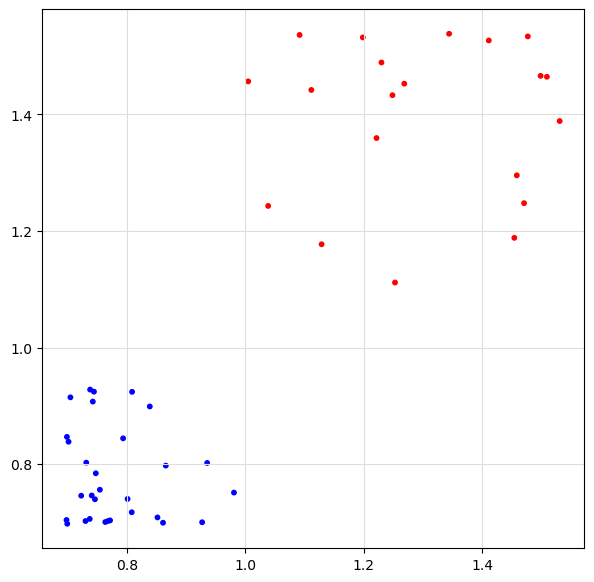

In [2]:
size = 1000 / num_rows
plt.figure(figsize=(7, 7))
threshold = 1

colors = np.where(z_train == threshold, 'blue', 'red')
plt.scatter(x_train, y_train, c=colors, s=size)

plt.grid(which='major', color='#DDDDDD', linewidth=0.8, zorder=1)

plt.show()

X Standardized is: 
0   -0.913710
1   -0.918174
2   -1.009126
3   -1.030145
4    1.513843
Name: Column_1, dtype: float64

Y Standardized is: 
0   -0.218036
1   -0.315587
2   -0.108872
3   -0.174950
4    0.487571
Name: Column_2, dtype: float64

First 5 rows of Dataframe: 
   Column_1  Column_2  Column_3  x_z_train  y_z_train
0  0.731247  0.802666       1.0  -0.913710  -0.218036
1  0.729997  0.702533       1.0  -0.918174  -0.315587
2  0.704530  0.914721       1.0  -1.009126  -0.108872
3  0.698644  0.846894       1.0  -1.030145  -0.174950
4  1.410999  1.526955       0.0   1.513843   0.487571

First 5 indices of Class 1: 
   x_z_train  y_z_train
0  -0.913710  -0.218036
1  -0.918174  -0.315587
2  -1.009126  -0.108872
3  -1.030145  -0.174950
5  -0.637198  -0.099676

First 5 indices of Class 2: 
    x_z_train  y_z_train
4    1.513843   0.487571
8    0.443505   0.404870
9    1.941252   0.352928
10   0.866611   0.450781
13   1.682577   0.262162


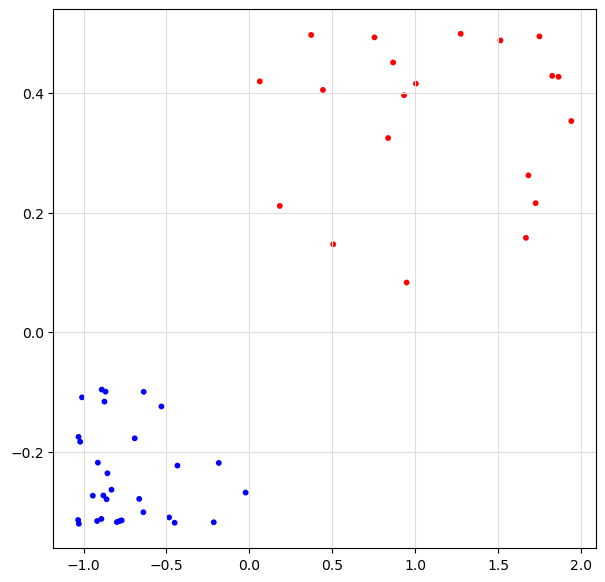

In [3]:
def standardize(x, y):
    u_x, u_y = np.mean(x), np.mean(y)
    std_x, std_y = np.std(x), np.mean(y)
    x_z = (x - u_x) / std_x
    y_z = (y - u_y) / std_y
    return x_z, y_z

x_z_train, y_z_train = standardize(x_train, y_train)

rd['x_z_train'] = x_z_train
rd['y_z_train'] = y_z_train
print(f'X Standardized is: \n{x_z_train.head()}\n\nY Standardized is: \n{y_z_train.head()}')
print(f'\nFirst 5 rows of Dataframe: \n{rd.head()}')

class_1 = pd.DataFrame({'x_z_train': x_z_train.loc[z_train.eq(1)], 'y_z_train': y_z_train.loc[z_train.eq(1)]})
class_2 = pd.DataFrame({'x_z_train': x_z_train.loc[z_train.eq(0)], 'y_z_train': y_z_train.loc[z_train.eq(0)]})
all_classes = [class_2, class_1]
classes_names = ['Class 2', 'Class 1']
class_values = [0, 1]
num_features = num_columns - 1

print(f"\nFirst 5 indices of Class 1: \n{class_1.head()}")
print(f"\nFirst 5 indices of Class 2: \n{class_2.head()}")

size = 1000 / num_rows
plt.figure(figsize=(7, 7))
threshold = 1

colors = np.where(z_train == threshold, 'blue', 'red')
plt.scatter(x_z_train, y_z_train, c=colors, s=size)

plt.grid(which='major', color='#DDDDDD', linewidth=0.8, zorder=1)

plt.show()

In [4]:
def prior_prob(classes_strings, all_classes, samples, dataset):
    n_k = []
    p_a = []
    n = samples
    for index, value in enumerate(all_classes):
        n_k.append(len(value))
        p_a.append(n_k[index] / n)
        print(f"The Prior Probability for {classes_names[index]} is: {p_a[index]*100}%")
    return p_a, n_k
    
prior_probabilities, length_of_classes = prior_prob(classes_names, all_classes, training_samples, rd)

The Prior Probability for Class 2 is: 40.0%
The Prior Probability for Class 1 is: 60.0%


In [5]:
def sample_mean(all_classes, num_class_samples, classes_strings, dataset):

    xk_sample_means, yk_sample_means = [], []
    
    for index, value in enumerate(all_classes):
        
        n_k = num_class_samples[index]
        xk_sample_means.append((1 / n_k) * np.sum(x_z_train[z_train == index]))
        yk_sample_means.append((1 / n_k) * np.sum(y_z_train[z_train == index]))
        print(f"\nThe Sample Mean for {classes_strings[index]}'s X-Value is: {xk_sample_means[index]}")
        print(f"\nThe Sample Mean for {classes_strings[index]}'s Y-Value is: {yk_sample_means[index]}")

    sample_means = np.zeros(num_features, dtype=float)
    
    k_sample_means = [xk_sample_means, yk_sample_means]

    sample_means = np.add(sample_means, k_sample_means)
    
    print(f'\n{sample_means}')
    
    return sample_means

sample_means = sample_mean(all_classes, length_of_classes, classes_names, rd)


The Sample Mean for Class 2's X-Value is: 1.1078064701804837

The Sample Mean for Class 2's Y-Value is: 0.35827880843969023

The Sample Mean for Class 1's X-Value is: -0.7385376467869886

The Sample Mean for Class 1's Y-Value is: -0.23885253895979364

[[ 1.10780647 -0.73853765]
 [ 0.35827881 -0.23885254]]


In [6]:
def find_W_matrix(all_classes):
    W = np.zeros((num_features, num_features), dtype=float)
    for class_values in all_classes:
        cov_matrix = np.cov(class_values[['x_z_train', 'y_z_train']], rowvar=False)
        W += cov_matrix
    return W
W = find_W_matrix(all_classes)
print(W)

[[ 0.44106989 -0.00065858]
 [-0.00065858  0.02400132]]


In [7]:
def find_B_matrix(W, training_set, all_classes, dataset):
    training_set = training_set.to_numpy()
    B = np.zeros((num_features, num_features), dtype=float)
    T = np.cov(training_set[:, :2], rowvar=False)
    B = T - W
    print(f'{B} \n\n{T}')
    return B, T
B, T = find_B_matrix(W, training_data, all_classes, rd)

[[-0.36106122  0.0780205 ]
 [ 0.0780205   0.07919212]] 

[[0.08000866 0.07736192]
 [0.07736192 0.10319344]]


In [8]:
def find_S(W, B):
    W_inv = np.linalg.inv(W + np.eye(W.shape[0]) * 1e-6)
    S = np.dot(W_inv, B)
    print(S)
    return S
S = find_S(W, B)

[[-0.81378117  0.18182267]
 [ 3.22821199  3.30434235]]


In [9]:
eigenvalues, eigenvectors = np.linalg.eig(S)
eigenvectors = eigenvectors.T

indices = np.argsort(abs(eigenvalues))[::-1]

print('\nEigenvalues:', eigenvalues)
print('\nEigenvectors:\n', eigenvectors)

eigenvalues = eigenvalues[indices]
eigenvectors = eigenvectors[indices]

print('\nSorted Eigenvalues:', eigenvalues)
print('\nSorted Eigenvectors:\n', eigenvectors)

first_evector = eigenvectors[:, 0]

print(f'\nFirst Eigenvector to be used as weights: {first_evector}')


Eigenvalues: [-0.95169402  3.4422552 ]

Eigenvectors:
 [[-0.79673681  0.60432644]
 [-0.04268219 -0.9990887 ]]

Sorted Eigenvalues: [ 3.4422552  -0.95169402]

Sorted Eigenvectors:
 [[-0.04268219 -0.9990887 ]
 [-0.79673681  0.60432644]]

First Eigenvector to be used as weights: [-0.04268219 -0.79673681]


In [10]:
scores = [[], [], []]
for index, value in enumerate(all_classes):
    scores[index].append((x_z_train[z_train==index] * first_evector[0]) + y_z_train[z_train==index] * first_evector[1])
    scores[-1].append((x_z_train * first_evector[0]) + (y_z_train * first_evector[1]))

var_scores = [[], []]

for index, value in enumerate(all_classes):
    var_scores[index].append(np.var(scores[index]))


total_var_scores = np.var(scores[-1]) / len(all_classes)


norm_weights = first_evector / (np.sqrt(total_var_scores))

new_scores = []
for index, value in enumerate(all_classes):
    new_scores.append((x_z_train * norm_weights[0]) + (y_z_train * norm_weights[1]))

new_var_score = np.var(new_scores[-1]) / len(all_classes)

print(f'\nThe Total Variance of the Scores is: {total_var_scores}')
print(f'\nThe Normalized Weights are: {norm_weights}')
print(f'\nThe Updated Variance of the Scores is: {new_var_score}')
print(f'\nThe Updated Scores are \n{new_scores}')


The Total Variance of the Scores is: 0.04034430375017315

The Normalized Weights are: [-0.21249838 -3.96664899]

The Updated Variance of the Scores is: 1.0000000000000002

The Updated Scores are 
[0     1.059036
1     1.446935
2     0.646295
3     0.912868
4    -2.255711
5     0.530784
6     0.605196
7     1.330899
8    -1.700219
9    -1.812456
10   -1.972243
11    0.569553
12    1.221090
13   -1.397449
14    0.850464
15   -0.979845
16    1.488597
17   -2.249143
18    1.284465
19   -1.464884
20    1.117112
21   -0.690344
22    0.976469
23   -2.049810
24    1.068078
25   -0.875991
26   -0.530781
27    0.942989
28    1.427537
29    1.246491
30   -1.860970
31   -1.222230
32    0.578484
33   -1.676112
34   -2.332612
35    1.269504
36   -2.114545
37   -2.089407
38    1.358956
39    0.645776
40    1.329457
41    1.418138
42    1.305588
43   -1.769344
44    1.428224
45    1.290536
46    1.411319
47    1.464583
48   -2.087372
49    0.906043
dtype: float64, 0     1.059036
1     1.446935
2     

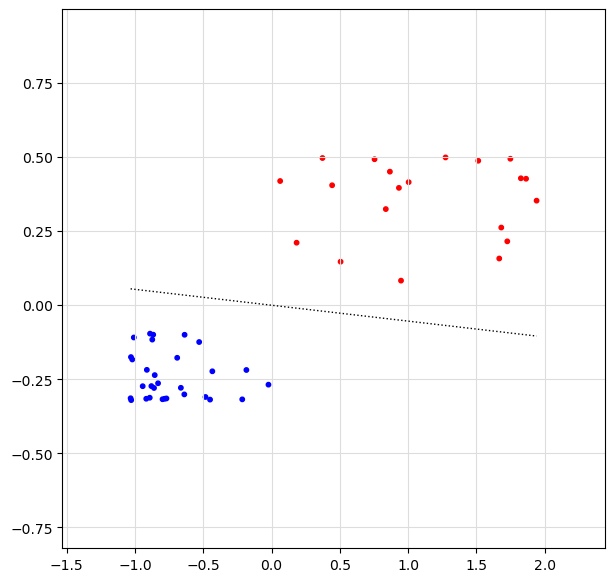

In [11]:
def decision_boundary(x):
    return -(norm_weights[0] / norm_weights[1]) * x

x_range = np.linspace(min(x_z_train), max(x_z_train))
y_range = decision_boundary(x_range)



size = 1000 / num_rows
plt.figure(figsize=(7, 7))
threshold = 1

colors = np.where(z_train == threshold, 'blue', 'red')

plt.plot(x_range, y_range, 'black', linewidth=1, linestyle =':', label='Decision Boundary')
plt.scatter(x_z_train, y_z_train, c=colors, s=size)

plt.xlim([x_z_train.min() - 0.5, x_z_train.max() + 0.5])
plt.ylim([y_z_train.min() - 0.5, y_z_train.max() + 0.5])

plt.grid(which='major', color='#DDDDDD', linewidth=0.8, zorder=1)

plt.show()

In [12]:
features = np.column_stack((x_z_train, y_z_train))

projections = features.dot(norm_weights)

mean_class_2 = projections[z_train == 0].mean()
mean_class_1 = projections[z_train == 1].mean()

threshold = (mean_class_2 + mean_class_1) / 2

predictions = np.where(projections > threshold, 1, 0)

accuracy = np.mean(predictions == z_train)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 100.00%


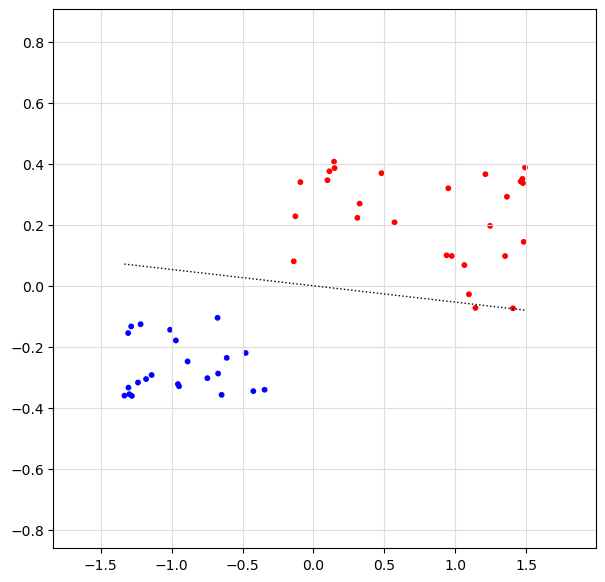

In [13]:
x_z_test, y_z_test = standardize(x_test, y_test)


x_range = np.linspace(min(x_z_test), max(x_z_test))
y_range = decision_boundary(x_range)


size = 1000 / num_rows
plt.figure(figsize=(7, 7))
threshold = 1

colors = np.where(z_test == threshold, 'blue', 'red')

plt.plot(x_range, y_range, 'black', linewidth=1, linestyle =':', label='Decision Boundary')
plt.scatter(x_z_test, y_z_test, c=colors, s=size)

plt.xlim([x_z_test.min() - 0.5, x_z_test.max() + 0.5])
plt.ylim([y_z_test.min() - 0.5, y_z_test.max() + 0.5])

plt.grid(which='major', color='#DDDDDD', linewidth=0.8, zorder=1)

plt.show()

In [14]:
features = np.column_stack((x_z_test, y_z_test))

projections = features.dot(norm_weights)

mean_class_2 = projections[z_test == 0].mean()
mean_class_1 = projections[z_test == 1].mean()

threshold = (mean_class_2 + mean_class_1) / 2

predictions = np.where(projections > threshold, 1, 0)

accuracy = np.mean(predictions == z_test)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 100.00%


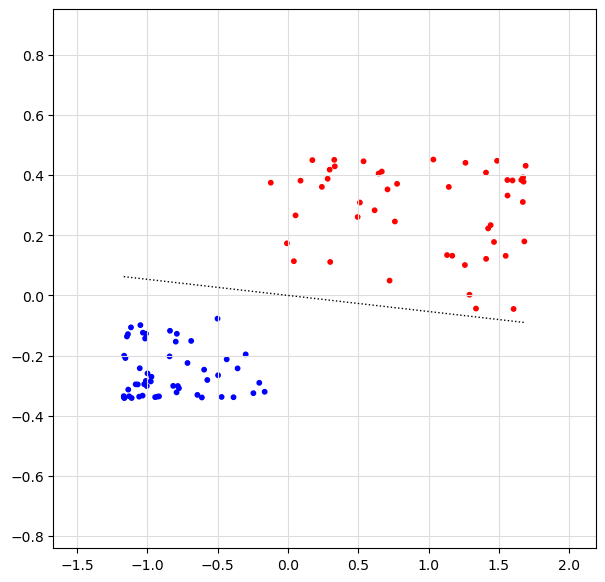

In [15]:
x_z, y_z = standardize(rd[x], rd[y])

x_range = np.linspace(min(x_z), max(x_z))
y_range = decision_boundary(x_range)

size = 1000 / num_rows
plt.figure(figsize=(7, 7))
threshold = 1

colors = np.where(rd[z] == threshold, 'blue', 'red')

plt.plot(x_range, y_range, 'black', linewidth=1, linestyle =':', label='Decision Boundary')
plt.scatter(x_z, y_z, c=colors, s=size)

plt.xlim([x_z.min() - 0.5, x_z.max() + 0.5])
plt.ylim([y_z.min() - 0.5, y_z.max() + 0.5])

plt.grid(which='major', color='#DDDDDD', linewidth=0.8, zorder=1)

plt.show()

In [16]:
features = np.column_stack((x_z, y_z))

projections = features.dot(norm_weights)

mean_class_2 = projections[rd[z] == 0].mean()
mean_class_1 = projections[rd[z] == 1].mean()

threshold = (mean_class_2 + mean_class_1) / 2

predictions = np.where(projections > threshold, 1, 0)

accuracy = np.mean(predictions == rd[z])
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 100.00%
